In [1]:
# Basic libraries for data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Machine learning preprocessing libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_validate


from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # Required for IterativeImputer
from sklearn.impute import IterativeImputer  # For MICE implementation

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.feature_selection import RFECV


# Metrics for evaluation
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                            roc_auc_score, confusion_matrix, classification_report,
                            roc_curve, precision_recall_curve, auc,ConfusionMatrixDisplay)

# Model interpretation
import shap

# Utilities
import os
import time
import joblib
from datetime import datetime
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

In [2]:
# Step 1: Load the dataset
file_path = r"/Users/jayendra/Documents/alzheimers_prediction_dataset.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Print the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Print dataset info
print("\nDataset information:")
print(df.info())



First 5 rows of the dataset:
        Country  Age  Gender  Education Level   BMI Physical Activity Level  \
0         Spain   90    Male                1  33.0                  Medium   
1     Argentina   72    Male                7  29.9                  Medium   
2  South Africa   86  Female               19  22.9                    High   
3         China   53    Male               17  31.2                     Low   
4        Sweden   58  Female                3  30.0                    High   

  Smoking Status Alcohol Consumption Diabetes Hypertension  ...  \
0          Never        Occasionally       No           No  ...   
1         Former               Never       No           No  ...   
2        Current        Occasionally       No          Yes  ...   
3          Never           Regularly      Yes           No  ...   
4         Former               Never      Yes           No  ...   

  Dietary Habits Air Pollution Exposure  Employment Status Marital Status  \
0        Healthy

In [3]:
# Step 2: Identify missing values and duplicates

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Remove duplicates if any exist
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")
    print(f"New dataset shape: {df.shape}")


Missing values per column:
Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban 

In [4]:
# Generate statistical summary for numerical columns
print("\nStatistical Summary for Numerical Columns:")
print(df.describe())


Statistical Summary for Numerical Columns:
                Age  Education Level           BMI  Cognitive Test Score
count  74283.000000     74283.000000  74283.000000          74283.000000
mean      71.964703         9.487514     26.780639             64.654241
std       12.980748         5.757020      4.764679             20.153247
min       50.000000         0.000000     18.500000             30.000000
25%       61.000000         4.000000     22.700000             47.000000
50%       72.000000         9.000000     26.800000             65.000000
75%       83.000000        14.000000     30.900000             82.000000
max       94.000000        19.000000     35.000000             99.000000


In [5]:
# First, let's check the exact column names in your dataset
print("Column names in the dataset:")
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

# Fix for the histplot - using column index approach
plt.figure(figsize=(10, 6))
target_column = df.columns[-1]  # Assuming target is the last column
print(f"Using target column: {target_column}")

Column names in the dataset:
0: Country
1: Age
2: Gender
3: Education Level
4: BMI
5: Physical Activity Level
6: Smoking Status
7: Alcohol Consumption
8: Diabetes
9: Hypertension
10: Cholesterol Level
11: Family History of Alzheimer’s
12: Cognitive Test Score
13: Depression Level
14: Sleep Quality
15: Dietary Habits
16: Air Pollution Exposure
17: Employment Status
18: Marital Status
19: Genetic Risk Factor (APOE-ε4 allele)
20: Social Engagement Level
21: Income Level
22: Stress Levels
23: Urban vs Rural Living
24: Alzheimer’s Diagnosis
Using target column: Alzheimer’s Diagnosis


<Figure size 1000x600 with 0 Axes>

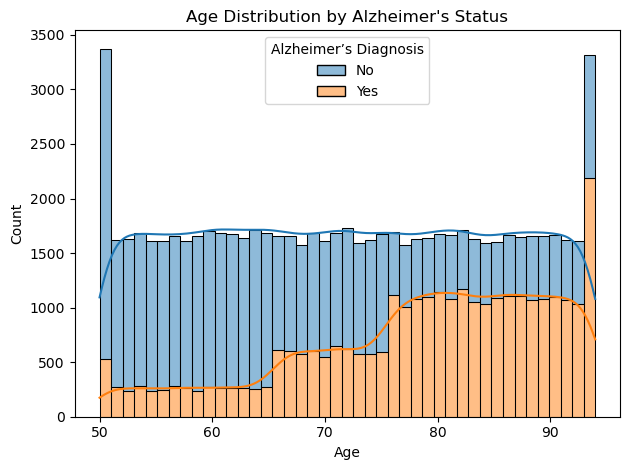

In [6]:
# Create age distribution by target variable
sns.histplot(data=df, x='Age', hue=target_column, kde=True, multiple='stack')
plt.title('Age Distribution by Alzheimer\'s Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('age_by_alzheimers.png')
plt.show()

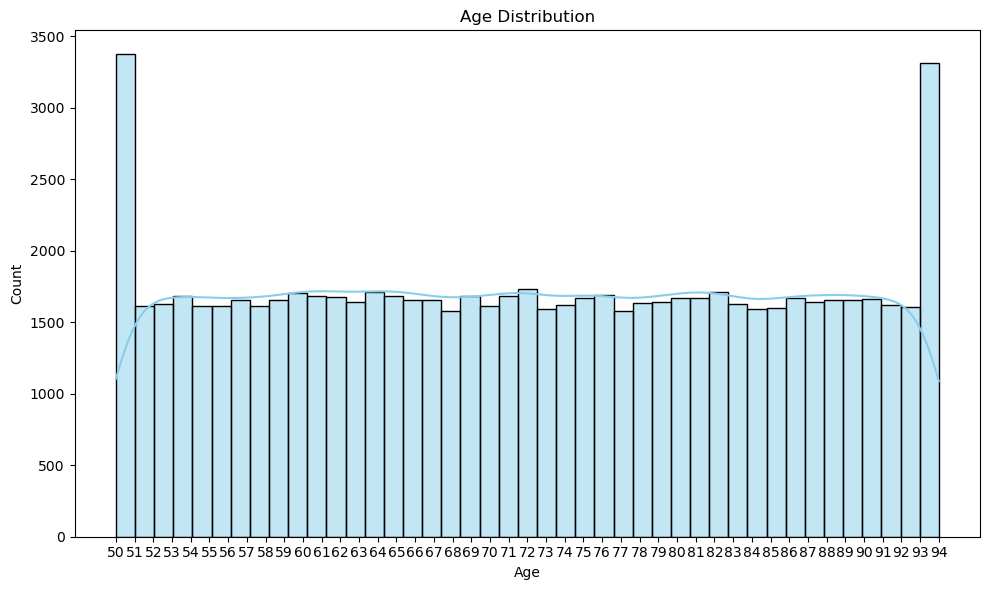

In [7]:


# 1. Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Set 1-unit ticks on the x-axis
min_age = int(df['Age'].min())
max_age = int(df['Age'].max())
plt.xticks(ticks=range(min_age, max_age + 1, 1))

plt.tight_layout()
plt.savefig('age_distribution.png', dpi=300)
plt.show()


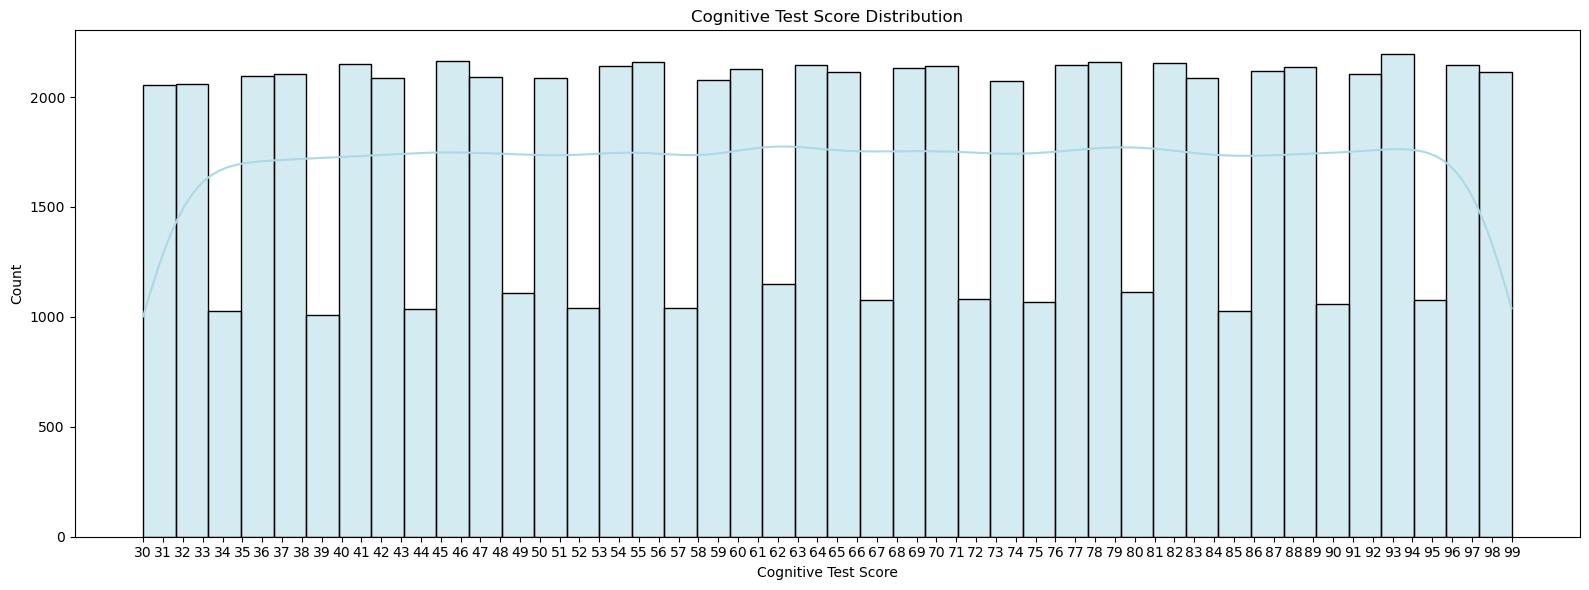

In [8]:
# 2. Cognitive Test Score Distribution
plt.figure(figsize=(16, 6))
sns.histplot(data=df, x='Cognitive Test Score', kde=True, color='lightblue')

plt.title('Cognitive Test Score Distribution')
plt.xlabel('Cognitive Test Score')
plt.ylabel('Count')

# Set 1-unit ticks on the x-axis
min_score = int(df['Cognitive Test Score'].min())
max_score = int(df['Cognitive Test Score'].max())
plt.xticks(ticks=range(min_score, max_score + 1, 1))

plt.tight_layout()
plt.savefig('cognitive_score_distribution.png', dpi=300)
plt.show()


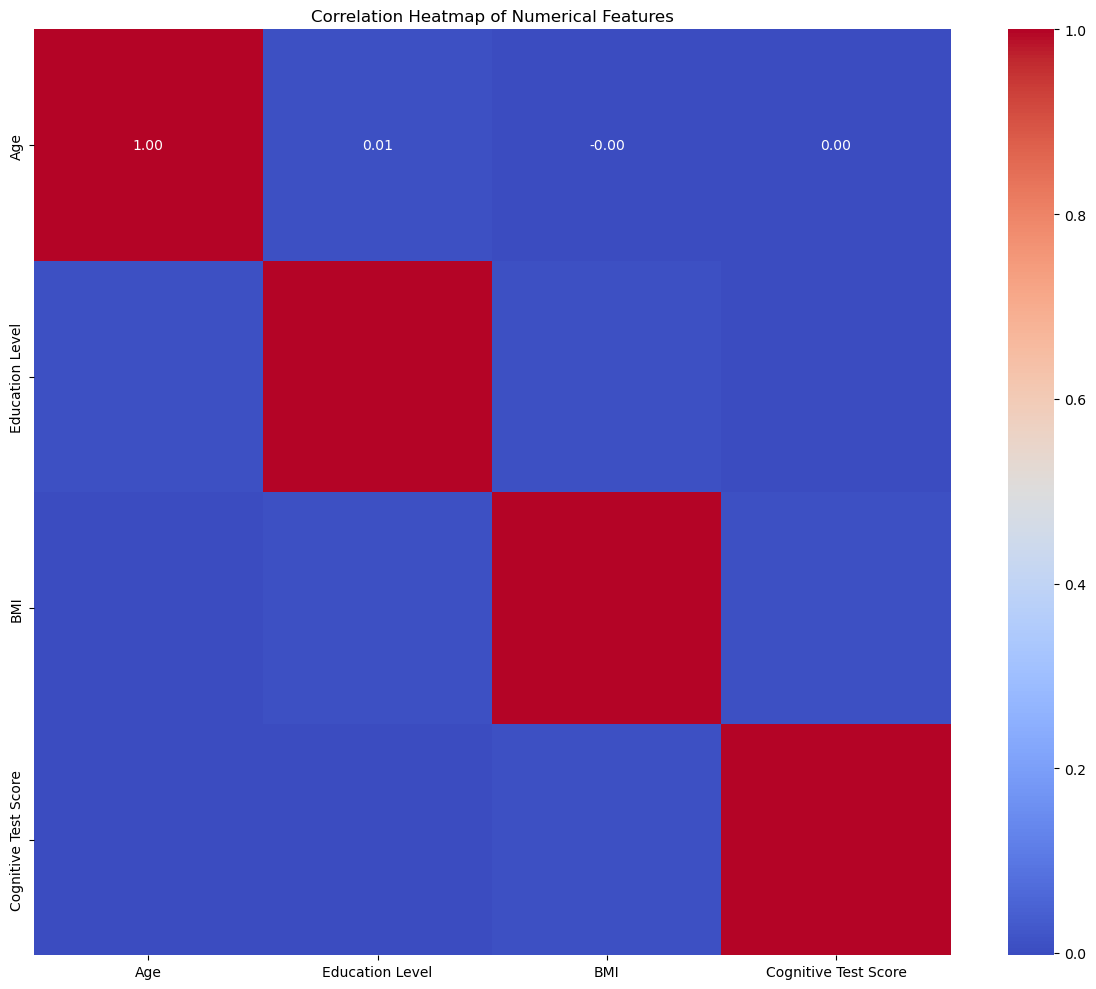

In [9]:
# 3. Correlation heatmap - using numeric columns only
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

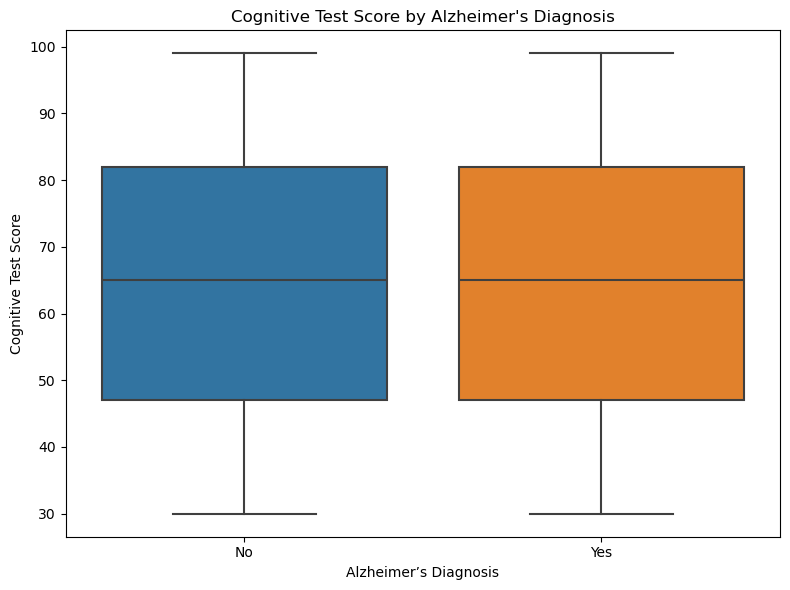

In [10]:
# 4. Box plot of Cognitive Score by Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x=target_column, y='Cognitive Test Score')
plt.title('Cognitive Test Score by Alzheimer\'s Diagnosis')
plt.tight_layout()
plt.savefig('cognitive_boxplot.png')
plt.show()

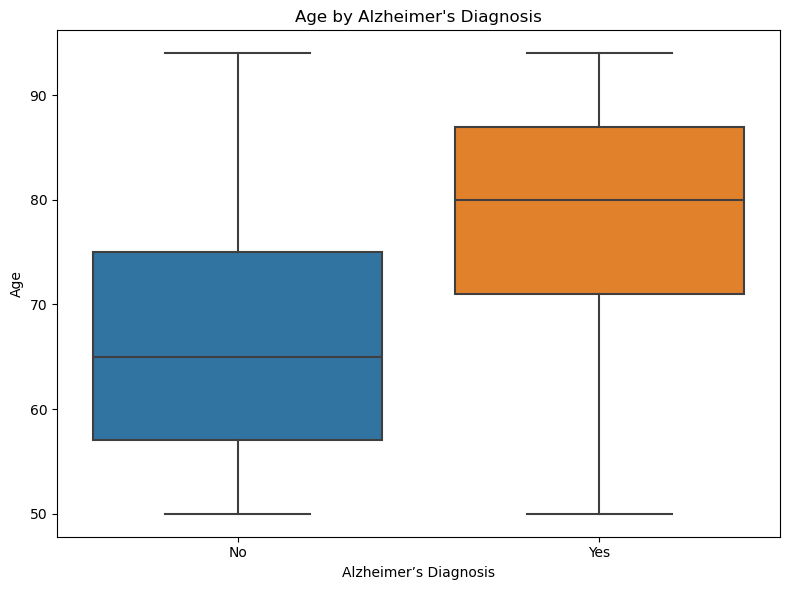

In [11]:
# 5. Boxplot of Age by Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x=target_column, y='Age')
plt.title('Age by Alzheimer\'s Diagnosis')
plt.tight_layout()
plt.savefig('age_boxplot.png')
plt.show()


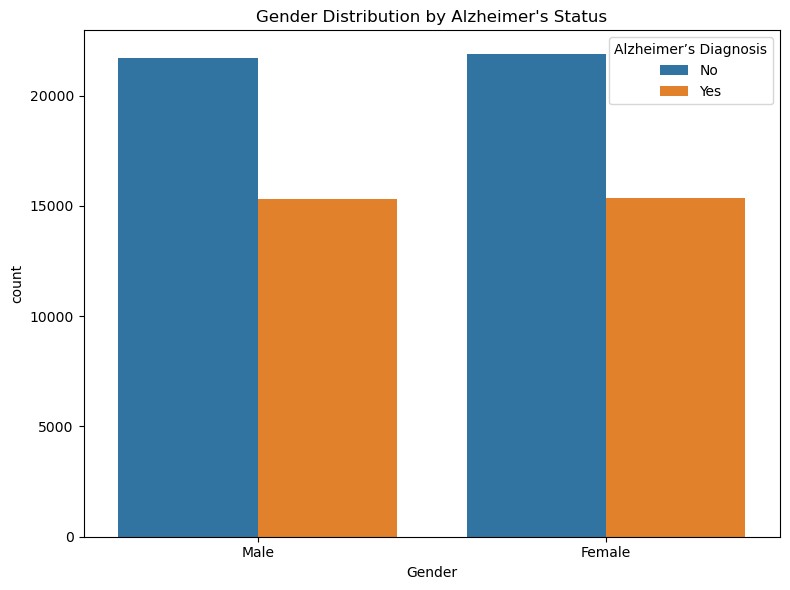

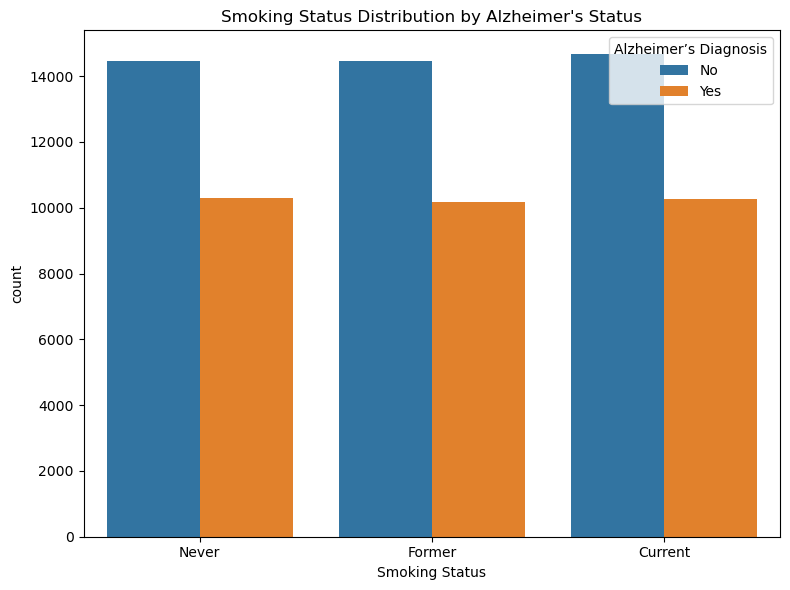

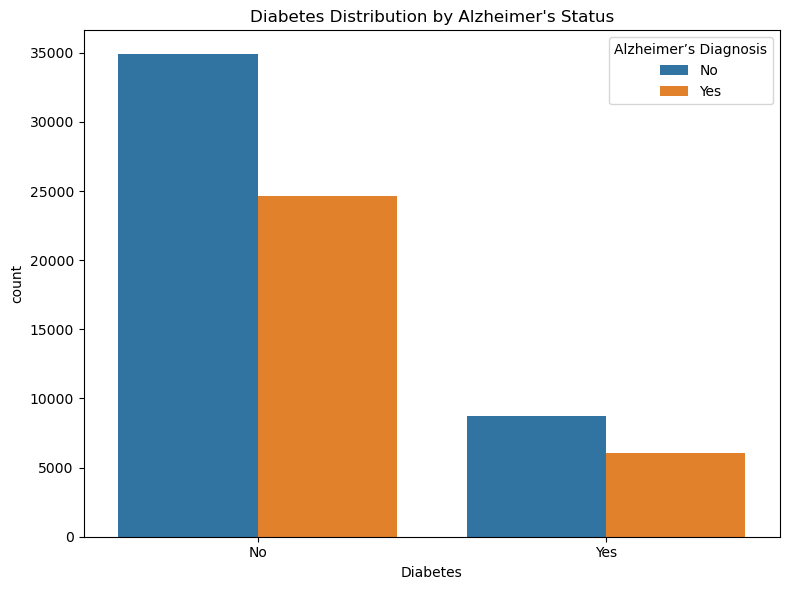

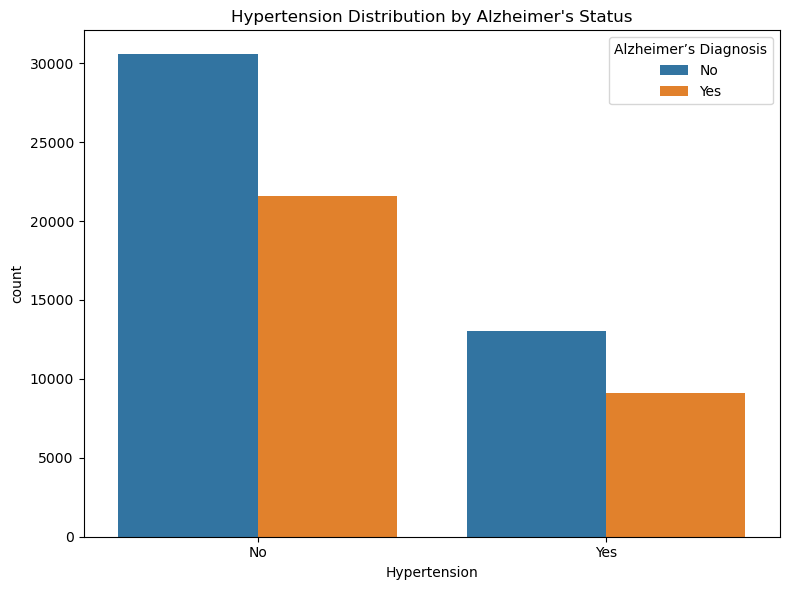

In [12]:
# Count plots for key categorical variables
categorical_vars = ['Gender', 'Smoking Status', 'Diabetes', 'Hypertension']
for var in categorical_vars:
    if var in df.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=var, hue=target_column)
        plt.title(f'{var} Distribution by Alzheimer\'s Status')
        plt.tight_layout()
        plt.savefig(f'{var.lower().replace(" ", "_")}_distribution.png')
        plt.show()

In [13]:
# Step 5: Feature Engineering and Target Definition
print("\n" + "="*50)
print("FEATURE ENGINEERING AND TARGET DEFINITION")
print("="*50)

# Separate features and target
target_column = df.columns[-1]  # Assuming target is the last column
X = df.drop(columns=[target_column])
y = df[target_column]

print(f"Target column: {target_column}")
print(f"Features shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")


FEATURE ENGINEERING AND TARGET DEFINITION
Target column: Alzheimer’s Diagnosis
Features shape: (74283, 24)
Target distribution:
Alzheimer’s Diagnosis
No     43570
Yes    30713
Name: count, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Step 1: Train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 2: Identify column types
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Step 3: Define transformers
num_transformer = Pipeline([
    ('imputer', IterativeImputer(random_state=42)),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Step 4: ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_cols),
    ('cat', cat_transformer, categorical_cols)
])

# Step 5: Fit-transform on train, transform on test
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Step 6: Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print(f"Preprocessing complete.\nTrain shape: {X_train_preprocessed.shape}\nTest shape: {X_test_preprocessed.shape}")


Preprocessing complete.
Train shape: (59426, 74)
Test shape: (14857, 74)



                            LOGISTIC REGRESSION MODEL

Train Confusion Matrix:
[[24724 10132]
 [ 6853 17717]]

Test Confusion Matrix:
[[6200 2514]
 [1690 4453]]


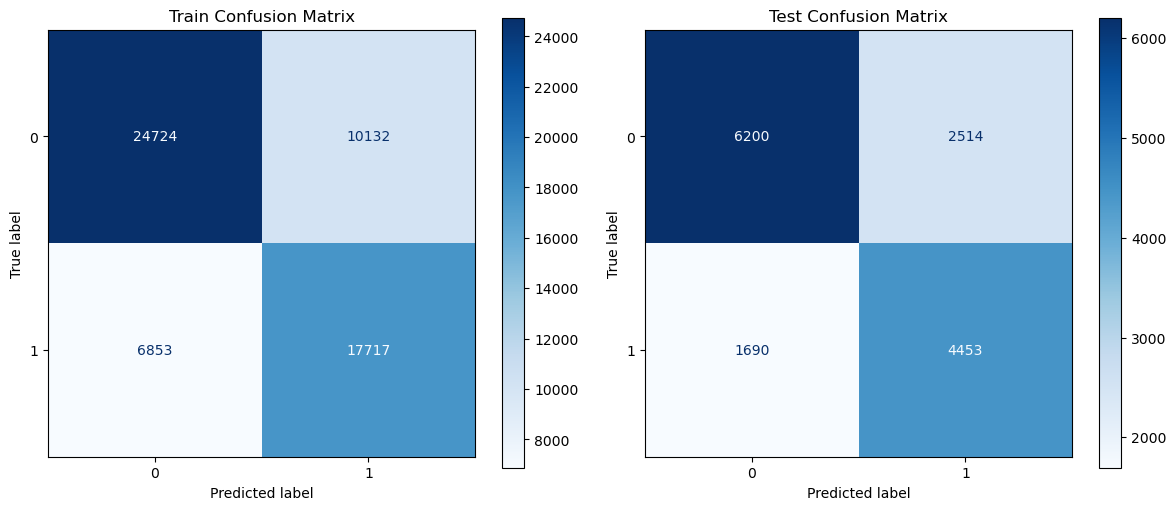


Classification Report (Train):
              precision    recall  f1-score   support

          No     0.7830    0.7093    0.7443     34856
         Yes     0.6362    0.7211    0.6760     24570

    accuracy                         0.7142     59426
   macro avg     0.7096    0.7152    0.7102     59426
weighted avg     0.7223    0.7142    0.7161     59426


Classification Report (Test):
              precision    recall  f1-score   support

          No     0.7858    0.7115    0.7468      8714
         Yes     0.6392    0.7249    0.6793      6143

    accuracy                         0.7170     14857
   macro avg     0.7125    0.7182    0.7131     14857
weighted avg     0.7252    0.7170    0.7189     14857



In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

# Suppress exponential formatting in numpy outputs
np.set_printoptions(suppress=True)

print("\n" + "="*80)
print(" "*28 + "LOGISTIC REGRESSION MODEL")
print("="*80)

# Step 1: Define model and hyperparameter grid
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': ['balanced', None]
}

# Step 2: Grid Search CV on training data
grid_lr = GridSearchCV(log_reg, log_reg_params, cv=cv, scoring='roc_auc', n_jobs=-1)
grid_lr.fit(X_train_preprocessed, y_train)
best_log_reg = grid_lr.best_estimator_

# Step 3: Predictions
y_train_pred = best_log_reg.predict(X_train_preprocessed)
y_test_pred = best_log_reg.predict(X_test_preprocessed)

# Step 4: Confusion Matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("\nTrain Confusion Matrix:")
print(train_cm)
print("\nTest Confusion Matrix:")
print(test_cm)

# Step 5: Plot side-by-side confusion matrices with readable integer values
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

disp_train = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=[0, 1])
disp_train.plot(ax=ax[0], cmap='Blues', values_format='d')
ax[0].set_title("Train Confusion Matrix")

disp_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=[0, 1])
disp_test.plot(ax=ax[1], cmap='Blues', values_format='d')
ax[1].set_title("Test Confusion Matrix")

plt.tight_layout()
plt.savefig("logistic_regression_cm_train_test_fixed.png", dpi=300)
plt.show()

# Step 6: Classification Reports
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred, digits=4))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred, digits=4))
